In [1]:
import numpy as np
from matplotlib import pyplot as plt

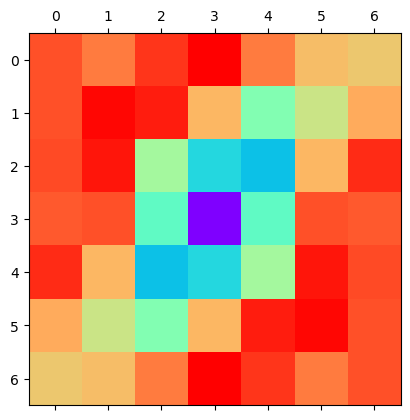

In [5]:
with open("../data/variogram_map.dat", "r") as arq:
    varmap = np.loadtxt(arq, delimiter=",")

plt.matshow(varmap, cmap="rainbow")

In [13]:
def center(varmap):
    M, N = varmap.shape
    return M//2, N//2

def test_center(varmap):
    i, j = center(varmap)
    varmap[i,j] == 0.2
    
test_center(varmap)

In [25]:
def getVariogramByAngle(varmap, angle):
    i_c, j_c = center(varmap)
    M, N = varmap.shape
    
    if angle == 45:
        numLags = min(M-i_c+1,N-j_c)
        variogramValues = np.zeros(numLags)
    
        for i in range(numLags):
            variogramValues[i] = varmap[i_c-i, j_c+i]
    elif angle == -45:
        numLags = min(i_c+1,j_c+1)
        variogramValues = np.zeros(numLags)
    
        for i in range(numLags):
            variogramValues[i] = varmap[i_c-i, j_c-i]
            
    return variogramValues

def test_getVariogramByAngle(varmap):
    np.all(getVariogramByAngle(varmap, angle=45) == np.array([0.2, 0.49, 0.88, 0.95]))
    np.all(getVariogramByAngle(varmap, angle=-45) == np.array([0.2, 0.8, 1.24, 1.14]))

test_getVariogramByAngle(varmap)